In [1]:
# Подключение необходимых библиотек
import random
import utils
import numpy as np
import timeit
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from queue import deque
from matplotlib.patches import Polygon
import heapq

In [2]:
A = random.randint(1, 9) 
print(A)

8


1.1) Для графа согласно варианту реализовать его представление в виде списка смежности и матрицы смежности.

In [31]:
_ = float('inf')

N={"a":{'c':7,'d':7},
   'b':{'n':8},
   'c':{'o':4},
   'd':{},
   'e':{'l':2},
   'f':{'c':2,'i':5},
   'g':{'o':11,'e':1},
   'h':{'b':8,'l':1},
   'i':{'h':1,'m':1},
   'j':{'l':2},
   'k':{'g':9},
   'l':{'k':9},
   'm':{'l':5,'o':2},
   'n':{'c':5,'m':1},
   'o':{}
}

M=[[ 0,_,7,7,_,_,_,_,_,_,_,_,_,_,_ ],   #a-1
   [ _,0,_,_,_,_,_,_,_,_,_,_,_,8,_ ],   #b-2    
   [ _,_,0,_,_,_,_,_,_,_,_,_,_,_,4 ],   #c-3
   [ _,_,_,0,_,_,_,_,_,_,_,_,_,_,_ ],   #d-4    blue
   [ _,_,_,_,0,_,_,_,_,_,_,2,_,_,_ ],   #e-5    
   [ _,_,2,_,_,0,_,_,5,_,_,_,_,_,_ ],   #f-6
   [ _,_,_,_,1,_,0,_,_,_,_,_,_,_,11],   #g-7    green
   [ _,8,_,_,_,_,_,0,_,_,_,1,_,_,_ ],   #h-8    
   [ _,_,_,_,_,_,_,1,0,_,_,_,1,_,_ ],   #i-9
   [ _,_,_,_,_,_,_,_,_,0,_,2,_,_,_ ],   #j-10
   [ _,_,_,_,_,_,9,_,_,_,0,_,_,_,_ ],   #k-11
   [ _,_,_,_,_,_,_,_,_,_,9,0,_,_,_ ],   #l-12
   [ _,_,_,_,_,_,_,_,_,_,_,5,0,_,2 ],   #m-13   red
   [ _,_,5,_,_,_,_,_,_,_,_,_,1,0,_ ],   #n-14
   [ _,_,_,_,_,_,_,_,_,_,_,_,_,_,0 ]]   #o=15   yellow

1.2) Используя оба представления реализовать базовые функции:
1.2.а) Ориентированный ли граф (считать граф простым)?

In [34]:
print("Список смежности")
print('b' in N['e'])
print('e' in N['b'])
print("Матрица смежности")
print(M[e][b]<_)
print(M[b][e]<_)

Список смежности
False
False
Матрица смежности
False
False


1.2.б) Сколько исходящих связей у вершины, закрашенной зелёным?

In [35]:
print("Список смежности")
print(len(N['g']))
print("Матрица смежности")
gr2=sum(1  for gr in M[g] if gr < _) -1
print(gr2)

Список смежности
2
Матрица смежности
2


1.2.в) Существует ли ребро между вершиной красной и вершиной жёлтой?

In [36]:
print("Список смежности")
print('m' in N['o'])
print('o' in N['m'])
print("Матрица смежности")
print(M[o][m]<_)
print(M[m][o]<_)

Список смежности
False
True
Матрица смежности
False
True


1.2.г) Каков вес данного ребра?

In [37]:
print("Список смежности")
print(N['m']['o'])
print("Матрица смежности")
print(M[m][o])

Список смежности
2
Матрица смежности
2


1.2.д) Вывести список всех вершин, связанных с синей с указанием их веса.

In [41]:
print("Список смежности")
print(N['c'])
print("Матрица смежности")
for i, v in enumerate(M[c]):
    if v < _ and v!=0:
        print(f'{i}:{v}')

Список смежности
{'o': 4}
Матрица смежности
14:4


Реализовать представление графа в NetworkX или PyVis, визуализировать граф.

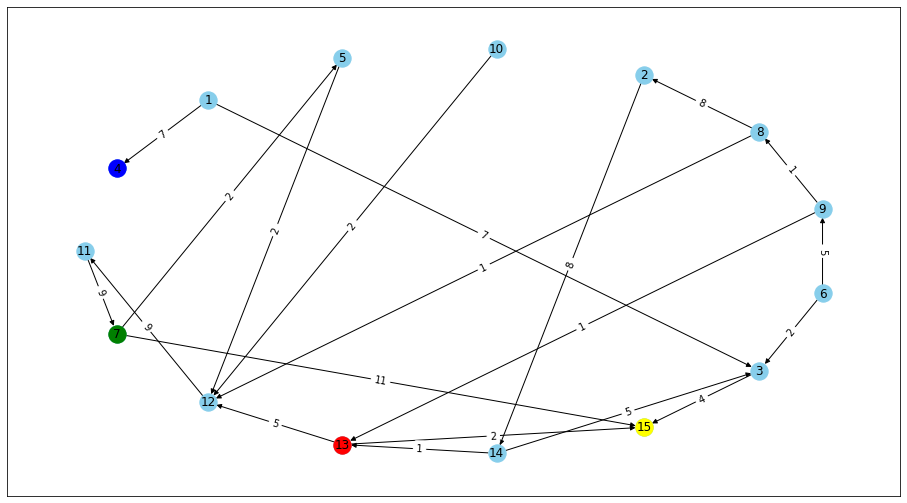

In [44]:
edgesss=[['11', '7', 9], ['12', '11', 9], ['13', '12', 5], ['14', '13', 1], ['13', '15', 2], ['14', '3', 5], ['6', '9', 5], ['7', '15', 11], ['8', '2', 8], ['9', '8', 1], ['10', '12', 2], ['9', '13', 1], ['5', '12', 2], ['6', '3', 2], ['7', '5', 2], ['8', '12', 1], ['1', '3', 7],['1', '4', 7], ['2', '14', 8], ['3', '15', 4]]
G = nx.DiGraph()
G.add_weighted_edges_from(edgesss)
pos = nx.shell_layout(G)
plt.figure(figsize=(16, 9))
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
nx.draw_networkx(G, pos, node_color='skyblue')
nx.draw_networkx_nodes(["13"], pos,  node_color='red')
nx.draw_networkx_nodes("7", pos,  node_color='green')
nx.draw_networkx_nodes("4", pos,  node_color='blue')
nx.draw_networkx_nodes(['15'], pos,  node_color='yellow')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
plt.show()

1.4)   Отобразить   путь   от   зелёной   вершины   до   красной,   перекрасив
соответствующие связи. Путь выбрать самостоятельно любой из возможных.

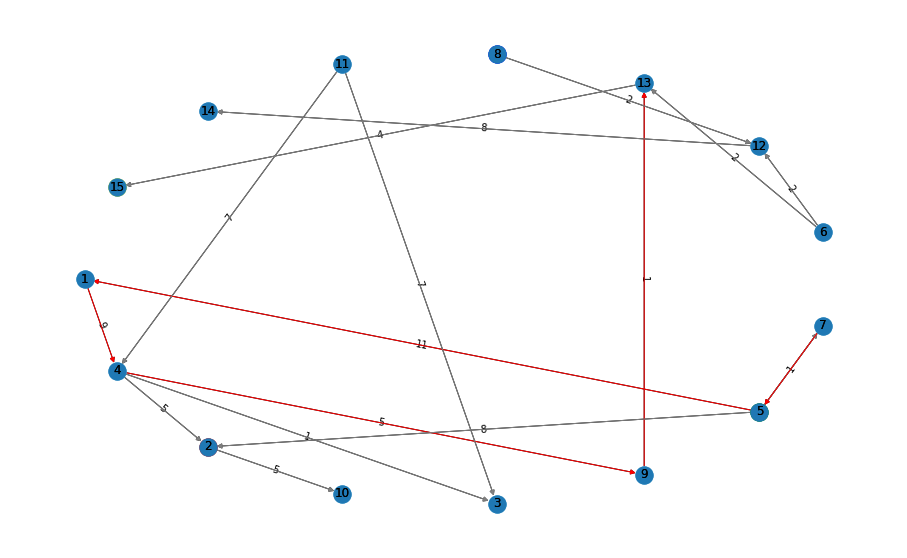

In [47]:
edgesss=[['1','4',9], ['2', '10', 5], ['4', '3', 1], ['4', '2', 5], ['4', '9', 5], ['5', '1', 11], ['5', '2', 8], ['5', '7', 1], ['6', '12', 2], ['9', '13', 1], ['6', '13', 2], ['7', '5', 1], ['8', '12', 2], ['11', '3', 7], ['11', '4', 7], ['12', '14', 8], ['13', '15', 4]]
G = nx.DiGraph()
G.add_weighted_edges_from(edgesss)
pos = nx.shell_layout(G)
plt.figure(figsize=(16, 10))
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
nx.draw_networkx(G, pos, node_color='skyblue')
nx.draw_networkx_nodes("2", pos,  node_color='red')
nx.draw_networkx_nodes("5", pos,  node_color='green')
nx.draw_networkx_nodes("8", pos,  node_color='blue')
nx.draw_networkx_nodes(['15'], pos,  node_color='yellow')
sp = nx.shortest_path(G,"7", "13")

sp_edges = [(sp[i],sp[i+1]) for i in range(len(sp)-1)]

edge_color_list = ["grey"]*len(G.edges)
for i, edge in enumerate(G.edges()):
    if edge in sp_edges:
        edge_color_list[i] = 'red'

nx.draw(G, with_labels=True, edge_color = edge_color_list,pos=pos)
plt.show()

2) Поиск пути по графу

In [54]:
B = random.randint(1, 20) 
print(B)

8


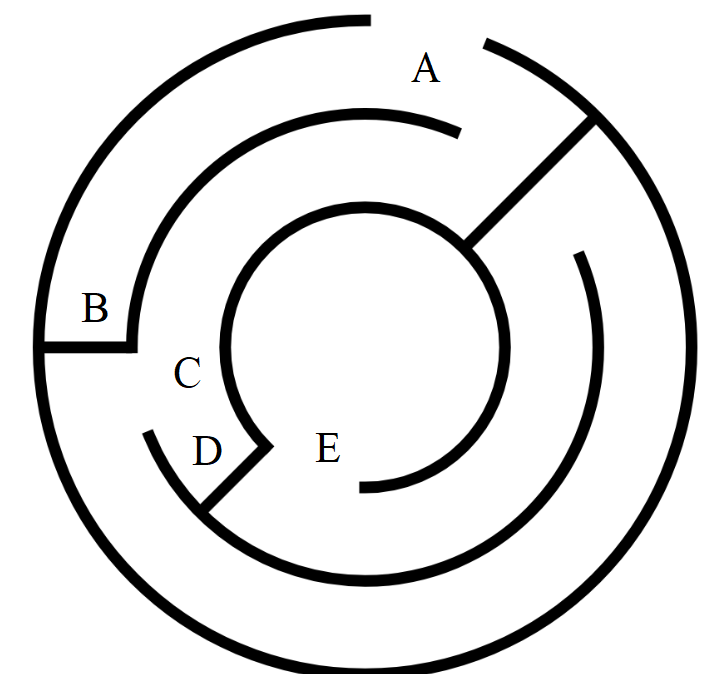

In [55]:
graph = {'A': ['B', 'C'],
         'B': [],
         'C': ['D', 'E'],
         'D': [],
         'E': []}

2.1)   Написать   собственный   алгоритм   поиска   пути   в   ширину.   Проверить
алгоритм на лабиринте согласно индивидуальному заданию

[['A', 'C', 'E']]


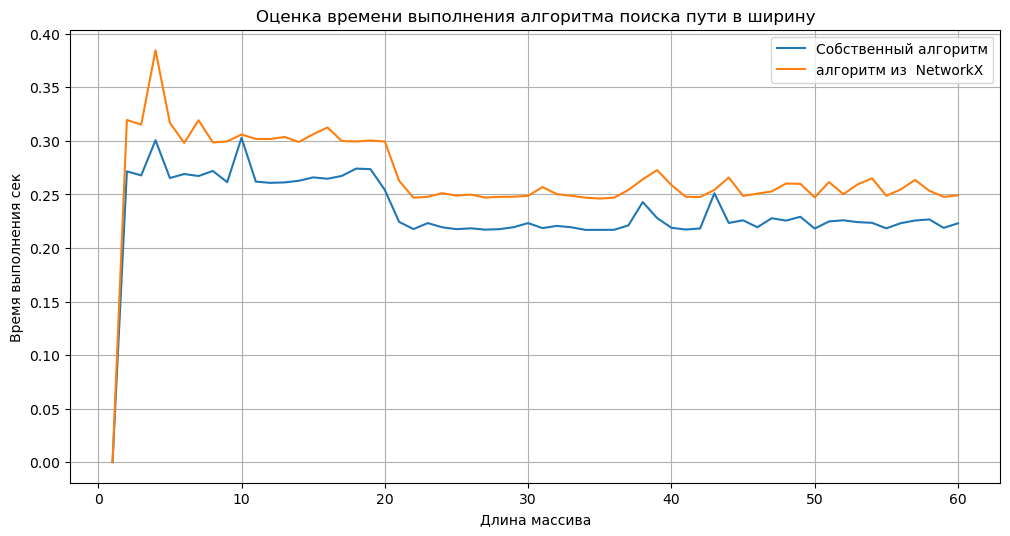

In [56]:
def bfs_paths(graph, start, goal):
    queue = deque([(start, [start])])
    while queue:
        (vertex, path) = queue.pop()
        for next in set(graph[vertex]) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.appendleft((next, path+[next]))

print(list(bfs_paths(graph, 'A', 'E')))

t1=np.zeros(60)                                                           # Создание массива для результатов обработки времени 
t11=np.zeros(60)
n1=np.arange(1,61,1)                                                      # Создание массива длин вектора 
n=2
while n<61:
    g=nx.gnm_random_graph(n,n)                                              # Создание вектора размера n 
    t11[n-1] = timeit.timeit('nx.bfs_edges(g, 0)', globals=globals())
    t1[n-1] = timeit.timeit('bfs_paths(g, 0,n)', globals=globals()          )         

    n+=1
   

fig, ax = plt.subplots(figsize = [12,6],dpi = 100)                          # Построение графиков 
plt.grid(visible=True)
ax.set_xlabel("Длина массива") 
ax.set_ylabel("Время выполнения сек") 
ax.set_title('Оценка времени выполнения алгоритма поиска пути в ширину') 
ax.plot(n1,t1,n1,t11);
ax.legend(labels = ("Собственный алгоритм","алгоритм из  NetworkX"), loc="best");

2.2)   Написать   собственный   алгоритм   поиска   пути   в   глубину.   Проверить
алгоритм на лабиринте согласно индивидуальному заданию.

[['A', 'C', 'E']]


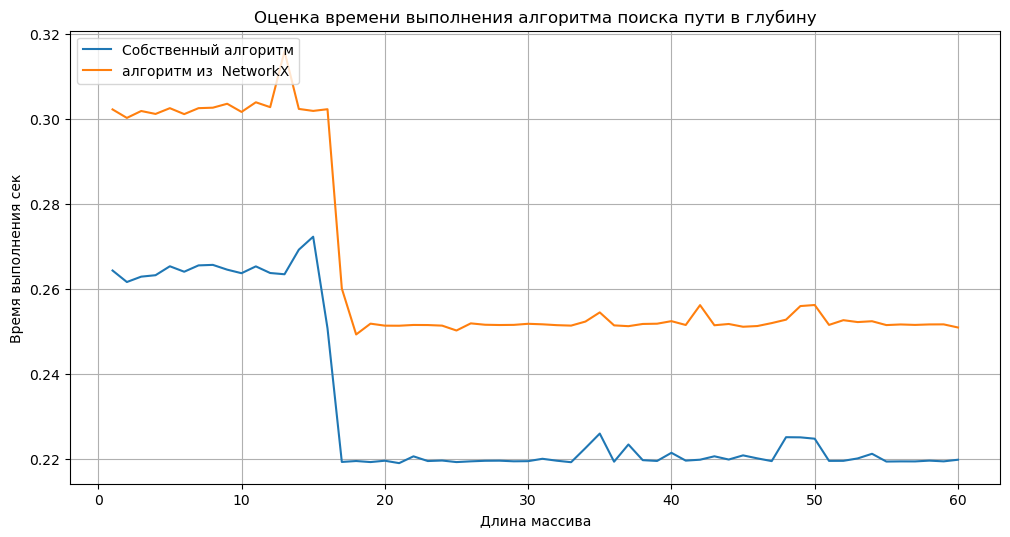

In [58]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]  
    while stack:
        (vertex, path) = stack.pop()
        for next in set(graph[vertex]) - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

print(list(dfs_paths(graph, 'A', 'E')))

t2=np.zeros(60)                                                           # Создание массива для результатов обработки времени 
t22=np.zeros(60)
n2=np.arange(1,61,1)                                                      # Создание массива длин вектора 
n=1
while n<61:
    g=nx.gnm_random_graph(n,n)                                              # Создание вектора размера n 
    t22[n-1] = timeit.timeit('nx.dfs_edges(g, 0)', globals=globals())
    t2[n-1] = timeit.timeit('dfs_paths(g, 0,n)', globals=globals()          )         

    n+=1
   

fig, ax = plt.subplots(figsize = [12,6],dpi = 100)                          # Построение графиков 
plt.grid(visible=True)
ax.set_xlabel("Длина массива") 
ax.set_ylabel("Время выполнения сек") 
ax.set_title('Оценка времени выполнения алгоритма поиска пути в глубину') 
ax.plot(n2,t2,n2,t22);
ax.legend(labels = ("Собственный алгоритм","алгоритм из  NetworkX"), loc="upper left");

2.3)   Написать   собственный   алгоритм   поиска   пути   по   методу   Дейкстры.
Проверить алгоритм на лабиринте согласно индивидуальному заданию

['A', 'E']


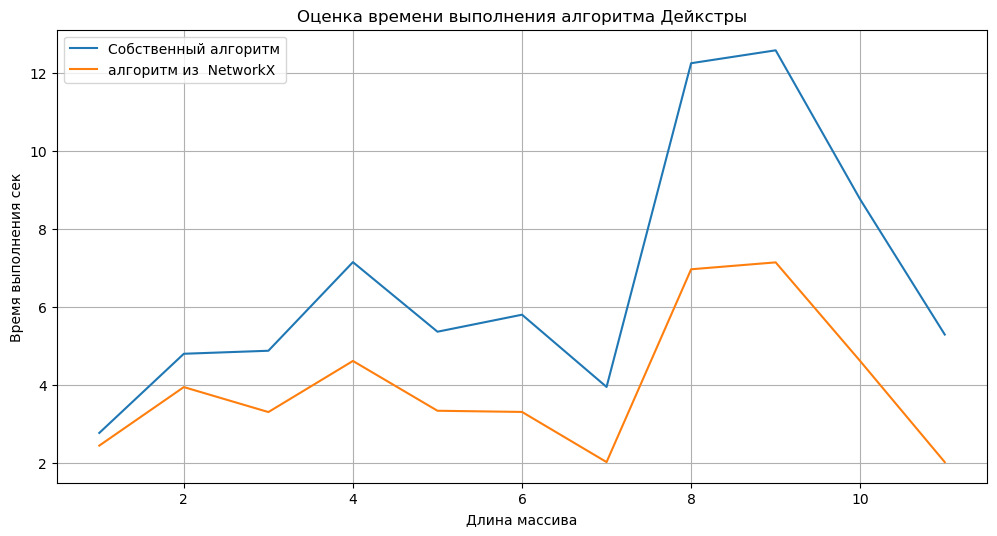

In [66]:
G={'B':{'A':5, 'D':1, 'G':2}, 'A':{'B':5, 'D':3, 'E':12, 'F':5}, 'D':{'B':1, 'G':1, 'E':1, 'A':3}, 'G':{'B':2, 'D':1, 'C':2}, 'C':{'G':2, 'E':1, 'F':16}, 'E':{'A':12, 'D':1, 'C':1, 'F':2}, 'F':{'A':5, 'E':2, 'C':16}}
def dijkstra(graph, start_node):
    distance = {node: float('inf') for node in graph}
    predecessor = {node: None for node in graph}
    distance[start_node] = 0
    queue = [(0, start_node)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            new_distance = current_distance 
            if new_distance < distance[neighbor]:
                distance[neighbor] = new_distance
                predecessor[neighbor] = current_node
                heapq.heappush(queue, (new_distance, neighbor))
    return distance, predecessor

def find_shortest_path(graph, start_node1,  end_node):
    distance_from_start1, predecessor_from_start1 = dijkstra(graph, start_node1)
    shortest_distance = distance_from_start1[end_node],
    
    if shortest_distance == float('inf'):
        return None  # No path found
    path = [end_node]
    while path[-1] != start_node1:
        path.append(predecessor_from_start1[path[-1]])
    return path[::-1]

print(find_shortest_path(G, 'A', 'E'))

t3=np.zeros(11)                                                           # Создание массива для результатов обработки времени 
t33=np.zeros(11)
n3=np.arange(1,12,1)                                                      # Создание массива длин вектора 
n=1
while n<12:
    g=nx.gnm_random_graph(n,int(n/2))                                              # Создание вектора размера n 
    t33[n-1] = timeit.timeit('nx.single_source_dijkstra(g, 0)', globals=globals())
    t3[n-1] = timeit.timeit('dijkstra(g, 0)', globals=globals()          )         

    n+=1
   

fig, ax = plt.subplots(figsize = [12,6],dpi = 100)                          # Построение графиков 
plt.grid(visible=True)
ax.set_xlabel("Длина массива") 
ax.set_ylabel("Время выполнения сек") 
ax.set_title('Оценка времени выполнения алгоритма Дейкстры') 
ax.plot(n3,t3,n3,t33);
ax.legend(labels = ("Собственный алгоритм","алгоритм из  NetworkX"), loc="upper left");

Предложить вариант визуализации любого из алгоритмов п. 1 — 4 для
отображения найденного пути на рисунке лабиринта.

![Гифка с Gifius.ru (2).gif](<attachment:Гифка с Gifius.ru (2).gif>)

In [ ]:
C = random.randint(1, 30) 
print(C)

21


3.1) Дан набор точек, координаты точки разделены пробелом. Одна строка —
одна точка. Выполнить поиск ближайшего соседа для первой точки. Поиск
провести   жадным   методом   и   используя   k-d-дерево.   Сравнить   k-d-дерево,
построенное   самостоятельно,   и   аналогичное   дерево,   построенное   с
использованием KDTree или cKDTree из библиотеки scipy.spatial, провести
поиск соседа, используя эту библиотеку. Провести сравнение быстродействия
алгоритмов для возрастающего числа точек

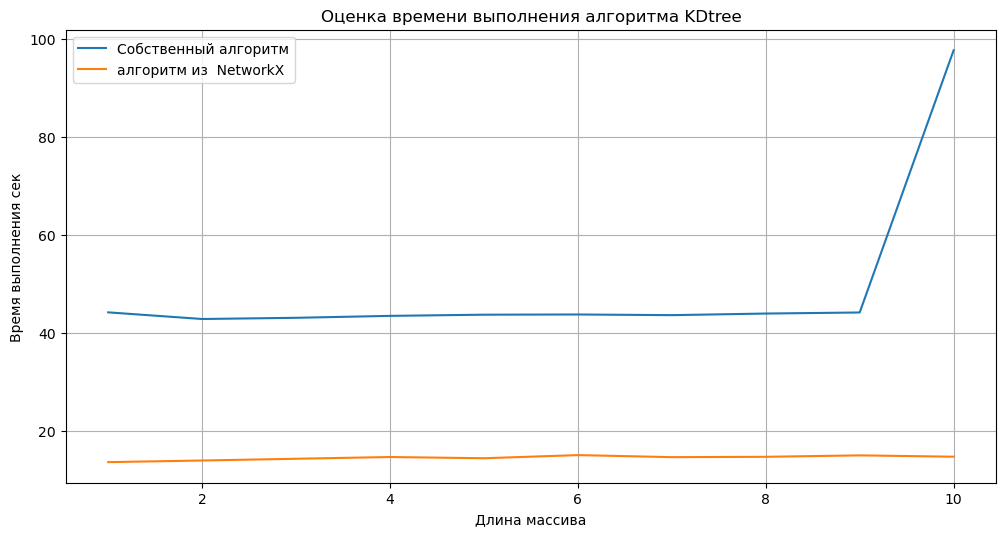

In [69]:
from sklearn.neighbors import KDTree
from scipy import spatial
x=[24, 30, 6,  23, 11, 33, 24, 16, 18, 9]
y=[8,  18, 28, 9,  30, 11, 15, 30, 1,  4]
r=np.zeros(len(x)-1)
for i in range(1,len(x)):
    r[i-1]=np.sqrt((x[i]-x[0])**2+(y[i]-y[0])**2)

t4=np.zeros(10) 
t44=np.zeros(10)                                                                         # Создание массива для результатов обработки времени 
n4=np.arange(1,11,1)                                                                     # Создание массива длин вектора 
n=1
while n<11:
    X = np.random.random((n, 2))
    t4[n-1] = timeit.timeit('KDTree(X)', globals=globals()          )         
    t44[n-1]= timeit.timeit('spatial.KDTree(X)', globals=globals() )
    n+=1
   

fig, ax = plt.subplots(figsize = [12,6],dpi = 100)                          # Построение графиков 
plt.grid(visible=True)
ax.set_xlabel("Длина массива") 
ax.set_ylabel("Время выполнения сек") 
ax.set_title('Оценка времени выполнения алгоритма KDtree') 
ax.plot(n4,t4,n4,t44);
ax.legend(labels = ("Собственный алгоритм","алгоритм из  NetworkX"), loc="upper left");


3,2) Дан набор многоугольников. Многоугольники заданы точками - вершинами
с парой координат, заданных аналогично п. 1. Вершины разделены точкой с
запятой. Провести поиск пересекающихся многоугольников, используя метод
Монте   —   Карло.   Выполнить   визуализацию   исходной   картины,   стороны
многоугольников покрасить в чёрный цвет. Пересекающиеся многоугольники
закрасить   красным.   Многоугольники,   не   пересекающиеся   с   другими
многоугольниками, закрасить зелёным

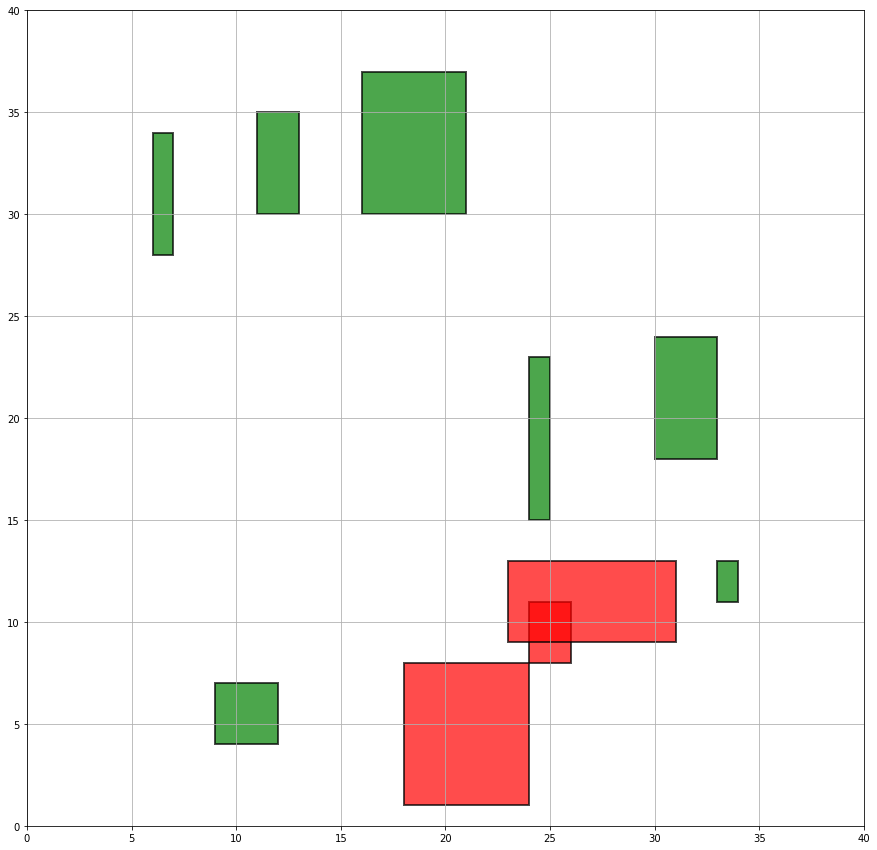

In [ ]:
def is_cross(a, b):
    commonPointOnX = list(set(a[0]) & set(b[0]))
    commonPointOnY = list(set(a[1]) & set(b[1]))
    return commonPointOnX != [] and commonPointOnY != []
ff=['green','green','green','green','green','green','green','green','green','green']
num_reps = 5000
x1 = [random.randint(0, 40) for i in range(num_reps)]   
y1 = [random.randint(0, 40) for i in range(num_reps)]
a=[[],[]]
b=[[],[]]
c=[[],[]]
d=[[],[]]
e=[[],[]]
f=[[],[]]
g=[[],[]]
h=[[],[]]
j=[[],[]]
ii=[[],[]]
M=[a,b,c,d,e,f,g,h,j,ii]
for i in range(num_reps):
    if (24<=x1[i]<=26)&(8<=y1[i]<=11):
        a[0].append(x1[i])
        a[1].append(y1[i])
    if (30<=x1[i]<=33)&(18<=y1[i]<=24):
        b[0].append(x1[i])
        b[1].append(y1[i])
    if (6<=x1[i]<=7)&(28<=y1[i]<=34):
        c[0].append(x1[i])
        c[1].append(y1[i])
    if (23<=x1[i]<=31)&(9<=y1[i]<=13):
        d[0].append(x1[i])
        d[1].append(y1[i])
    if (11<=x1[i]<=13)&(30<=y1[i]<=35):
        e[0].append(x1[i])
        e[1].append(y1[i])
    if (33<=x1[i]<=34)&(11<=y1[i]<=13):
        f[0].append(x1[i])
        f[1].append(y1[i])
    if (24<=x1[i]<=25)&(15<=y1[i]<=23):
        g[0].append(x1[i])
        g[1].append(y1[i])
    if (16<=x1[i]<=21)&(30<=y1[i]<=37):
        h[0].append(x1[i])
        h[1].append(y1[i])
    if (18<=x1[i]<=24)&(1<=y1[i]<=8):
        j[0].append(x1[i])
        j[1].append(y1[i])
    if (9<=x1[i]<=12)&(4<=y1[i]<=7):
        ii[0].append(x1[i])
        ii[1].append(y1[i])    
 
M=[a,b,c,d,e,f,g,h,j,ii]
k=0
for i in range(0,10):
    for jj in range(0,10):
        if(is_cross(M[i],M[jj]))&(i!=jj):
            ff[jj]='red'
              


polygon1  = Polygon([(24,8),  (24,11), (26,11), (26,8)  ],edgecolor='black',facecolor=ff[0],linewidth=2,alpha=0.7)
polygon2  = Polygon([(30,18), (30,24), (33,24), (33,18) ],edgecolor='black',facecolor=ff[1],linewidth=2,alpha=0.7)
polygon3  = Polygon([(6,28),  (6,34),  (7,34),  (7,28)  ],edgecolor='black',facecolor=ff[2],linewidth=2,alpha=0.7)
polygon4  = Polygon([(23,9),  (23,13), (31,13), (31,9)  ],edgecolor='black',facecolor=ff[3],linewidth=2,alpha=0.7)
polygon5  = Polygon([(11,30), (11,35), (13,35), (13,30) ],edgecolor='black',facecolor=ff[4],linewidth=2,alpha=0.7)
polygon6  = Polygon([(33,11), (33,13), (34,13), (34,11) ],edgecolor='black',facecolor=ff[5],linewidth=2,alpha=0.7)
polygon7  = Polygon([(24,15), (24,23), (25,23), (25,15) ],edgecolor='black',facecolor=ff[6],linewidth=2,alpha=0.7)
polygon8  = Polygon([(16,30), (16,37), (21,37), (21,30) ],edgecolor='black',facecolor=ff[7],linewidth=2,alpha=0.7)
polygon9  = Polygon([(18,1),  (18,8),  (24,8),  (24,1)  ],edgecolor='black',facecolor=ff[8],linewidth=2,alpha=0.7)
polygon10 = Polygon([(9,4),   (9,7),   (12,7),  (12,4)  ],edgecolor='black',facecolor=ff[9],linewidth=2,alpha=0.7)
fig, ax = plt.subplots(figsize = [15,15]) 
plt.grid(visible=True)
ax.add_patch(polygon1)
ax.add_patch(polygon2)
ax.add_patch(polygon3)
ax.add_patch(polygon4)
ax.add_patch(polygon5)
ax.add_patch(polygon6)
ax.add_patch(polygon7)
ax.add_patch(polygon8)
ax.add_patch(polygon9)
ax.add_patch(polygon10)
plt.ylim(0,40)
plt.xlim(0,40);